# Script Práctica 2 Parte 2 (Clasificación imágenes)

Redes de Neuronas Artificiales, curso 2022-2023

Universidad Carlos III de Madrid

# Importar TensorFlow, ciertos módulos de Keras y las librerías numpy y pandas.

In [341]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Para trabajar con un repositorio almacenado en drive

In [342]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Abrir el path concreto
#!ls
#%cd "/content/drive/MyDrive/RN/Practica1/parte1"
#!ls

Mounted at /content/drive/


# Descargar y observar el dataset

In [343]:
# Descarga del dataset
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()
# Nombre semántico de las clases
class_names={0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
             5: 'Sandal',  6: 'Shirt',   7: 'Sneaker',  8: 'Bag',   9: 'Ankle Boot'}

In [344]:
#DIMENSION DE LOS DATOS
print("Dimensiones train_images")
print(train_images.shape)
print("Dimensiones test_images")
print(test_images.shape)
print("Dimensiones train_labels")
print(train_labels.shape)
print("Dimensiones test_labels")
print(test_labels.shape)

# OBTENER NUMERO DE CLASES
num_clases=len(np.unique(train_labels))
print("Número de clases")
print(num_clases)

#NUMERO DE PATRONES POR CLASE
print("Número patrones train")
print(pd.DataFrame(train_labels).value_counts())
print("Número patrones test")
print(pd.DataFrame(test_labels).value_counts())

Dimensiones train_images
(60000, 28, 28)
Dimensiones test_images
(10000, 28, 28)
Dimensiones train_labels
(60000,)
Dimensiones test_labels
(10000,)
Número de clases
10
Número patrones train
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64
Número patrones test
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64


Observando contenido patrones

In [345]:
# Observar datos de un patrón (pixeles)
print("Contenido patrón 3 train")
print(train_images[3])
print("Contenido patrón 3 test")
print(train_labels[3])

Contenido patrón 3 train
[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194
  102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179
  186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152
  148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140
  137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131
  131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119
  140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117
  127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119
  127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 1

In [346]:
"""# Pintando el patrón 3 train
plt.figure(figsize=(10,10))
plt.imshow(train_images[3], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[3]])
plt.show()"""

'# Pintando el patrón 3 train\nplt.figure(figsize=(10,10))\nplt.imshow(train_images[3], cmap=plt.cm.binary)\nplt.xlabel(class_names[train_labels[3]])\nplt.show()'

In [347]:
"""# VER ALGUNAS IMÁGENES. LAS 25 PRIMERAS DEL CONJUNTO DE ENTRENAMIENTO
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()"""

'# VER ALGUNAS IMÁGENES. LAS 25 PRIMERAS DEL CONJUNTO DE ENTRENAMIENTO\nplt.figure(figsize=(10,10))\nfor i in range(25):\n    plt.subplot(5,5,i+1)\n    plt.xticks([])\n    plt.yticks([])\n    plt.grid(False)\n    plt.imshow(train_images[i], cmap=plt.cm.binary)\n    plt.xlabel(class_names[train_labels[i]])\nplt.show()'

# Definición modelo

In [348]:
# Definición de la semilla
from numpy.random import seed
from tensorflow.keras.utils import set_random_seed

semilla=1
seed(semilla)
set_random_seed(semilla)

In [349]:
# Guardar el checkpoint del mejor modelo
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel', monitor='val_loss',
                             mode='min',
                             verbose=1,
                             save_best_only=True)
callbacks_list = [checkpoint]

Definir un modelo con Perceptrón Multicapa MLP
- https://keras.io/api/layers/normalization_layers/batch_normalization/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/layers/reshaping_layers/flatten/
- https://keras.io/api/layers/core_layers/dense/

In [350]:
#DEFINICIÓN DE UN PM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Flatten

model_pm = Sequential()
model_pm.add(BatchNormalization(input_shape=(28,28)))
model_pm.add(Flatten(input_shape=(28,28)))
model_pm.add(Dense(120, activation='relu'))
model_pm.add(Dropout(0.35))
model_pm.add(Dense(120, activation='relu'))
model_pm.add(Dropout(0.35))
model_pm.add(Dense(num_clases, activation='softmax'))

model_pm.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_34 (Bat  (None, 28, 28)           112       
 chNormalization)                                                
                                                                 
 flatten_34 (Flatten)        (None, 784)               0         
                                                                 
 dense_85 (Dense)            (None, 120)               94200     
                                                                 
 dropout_95 (Dropout)        (None, 120)               0         
                                                                 
 dense_86 (Dense)            (None, 120)               14520     
                                                                 
 dropout_96 (Dropout)        (None, 120)               0         
                                                     

CNN. Enlaces a la librería
- https://keras.io/api/layers/normalization_layers/batch_normalization/
- https://keras.io/api/layers/convolution_layers/convolution2d/
- https://keras.io/api/layers/pooling_layers/max_pooling2d/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/layers/reshaping_layers/flatten/
- https://keras.io/api/layers/core_layers/dense/

Ejemplo CNN Conv2D + ilustrando los feature map

In [351]:
"""from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
# Se define un modelo con una única capa de Conv2D. Aplica 64 filtros, con kernel tamaño 5x5
model_cnn = Sequential()
model_cnn.add(Conv2D(input_shape=(28,28,1), filters=64, kernel_size=(5, 5), activation='relu'))
# Se aplica el modelo sobre la imagen 3 de train
data = np.array([train_images[3]])
feature_map = model_cnn.predict(data)

# Se ilustran todos los feature maps obtenidos
plt.figure(figsize=(15,15))
for i in range(64):
  ax = plt.subplot(8,8,i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  feature_img = feature_map[0,:,:,i]
  plt.imshow(feature_img, cmap="gray")
plt.show()"""

'from keras.models import Sequential\nfrom keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten\n# Se define un modelo con una única capa de Conv2D. Aplica 64 filtros, con kernel tamaño 5x5\nmodel_cnn = Sequential()\nmodel_cnn.add(Conv2D(input_shape=(28,28,1), filters=64, kernel_size=(5, 5), activation=\'relu\'))\n# Se aplica el modelo sobre la imagen 3 de train\ndata = np.array([train_images[3]])\nfeature_map = model_cnn.predict(data)\n\n# Se ilustran todos los feature maps obtenidos\nplt.figure(figsize=(15,15))\nfor i in range(64):\n  ax = plt.subplot(8,8,i+1)\n  ax.set_xticks([])\n  ax.set_yticks([])\n  feature_img = feature_map[0,:,:,i]\n  plt.imshow(feature_img, cmap="gray")\nplt.show()'

Cosa


In [352]:
#DEFINICIÓN DE UNA CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
#Borrar lr_bueno
lr=0.001

model_cnn= Sequential()
model_cnn.add(BatchNormalization(input_shape=(28,28,1)))

"""model_cnn.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))"""

"""model_cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))"""

"""model_cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))"""

model_cnn.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

"""model_cnn.add(Conv2D(filters=200, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))"""

model_cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

"""model_cnn.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))"""

model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu')) # En la imagen pone 356, está mal.
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(num_clases, activation='softmax'))

model_cnn.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_35 (Bat  (None, 28, 28, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_46 (Conv2D)          (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 dropout_97 (Dropout)        (None, 12, 12, 128)       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 10, 10, 256)       295168    
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 5, 5, 256)      

In [353]:
model_cnn.compile(
  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

In [354]:
model_pm.compile(
  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

# Entrenar y obtener resultados

In [355]:
historico_cnn = model_cnn.fit(train_images, train_labels, epochs=9, validation_freq=1, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/9
1489/1500 [============================>.] - ETA: 0s - loss: 0.4952 - sparse_categorical_accuracy: 0.8216
Epoch 1: val_loss improved from inf to 0.33937, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 10s 6ms/step - loss: 0.4944 - sparse_categorical_accuracy: 0.8220 - val_loss: 0.3394 - val_sparse_categorical_accuracy: 0.8795
Epoch 2/9
1494/1500 [============================>.] - ETA: 0s - loss: 0.3509 - sparse_categorical_accuracy: 0.8720
Epoch 2: val_loss improved from 0.33937 to 0.28890, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 10s 6ms/step - loss: 0.3505 - sparse_categorical_accuracy: 0.8723 - val_loss: 0.2889 - val_sparse_categorical_accuracy: 0.8947
Epoch 3/9
1493/1500 [============================>.] - ETA: 0s - loss: 0.3060 - sparse_categorical_accuracy: 0.8885
Epoch 3: val_loss improved from 0.28890 to 0.26475, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 9s 6ms/step - loss: 0.3060 - sparse_categorical_accuracy: 0.8885 - val_loss: 0.2648 - val_sparse_categorical_accuracy: 0.9035
Epoch 4/9
1494/1500 [============================>.] - ETA: 0s - loss: 0.2824 - sparse_categorical_accuracy: 0.8961
Epoch 4: val_loss improved from 0.26475 to 0.26402, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 9s 6ms/step - loss: 0.2823 - sparse_categorical_accuracy: 0.8962 - val_loss: 0.2640 - val_sparse_categorical_accuracy: 0.9000
Epoch 5/9
1500/1500 [==============================] - ETA: 0s - loss: 0.2631 - sparse_categorical_accuracy: 0.9016
Epoch 5: val_loss improved from 0.26402 to 0.26061, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 9s 6ms/step - loss: 0.2631 - sparse_categorical_accuracy: 0.9016 - val_loss: 0.2606 - val_sparse_categorical_accuracy: 0.9056
Epoch 6/9
1496/1500 [============================>.] - ETA: 0s - loss: 0.2495 - sparse_categorical_accuracy: 0.9078
Epoch 6: val_loss improved from 0.26061 to 0.24055, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 9s 6ms/step - loss: 0.2496 - sparse_categorical_accuracy: 0.9078 - val_loss: 0.2406 - val_sparse_categorical_accuracy: 0.9093
Epoch 7/9
1497/1500 [============================>.] - ETA: 0s - loss: 0.2351 - sparse_categorical_accuracy: 0.9130
Epoch 7: val_loss did not improve from 0.24055
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2352 - sparse_categorical_accuracy: 0.9130 - val_loss: 0.2416 - val_sparse_categorical_accuracy: 0.9141
Epoch 8/9
1497/1500 [============================>.] - ETA: 0s - loss: 0.2208 - sparse_categorical_accuracy: 0.9177
Epoch 8: val_loss improved from 0.24055 to 0.23076, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 9s 6ms/step - loss: 0.2208 - sparse_categorical_accuracy: 0.9176 - val_loss: 0.2308 - val_sparse_categorical_accuracy: 0.9160
Epoch 9/9
1496/1500 [============================>.] - ETA: 0s - loss: 0.2114 - sparse_categorical_accuracy: 0.9211
Epoch 9: val_loss improved from 0.23076 to 0.22811, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 10s 6ms/step - loss: 0.2114 - sparse_categorical_accuracy: 0.9211 - val_loss: 0.2281 - val_sparse_categorical_accuracy: 0.9153


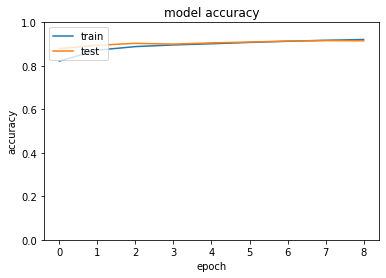

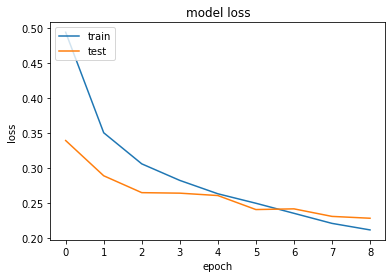

In [356]:
# GRAFICOS DE EVOLUCIÓN PARA la CNN
from matplotlib import pyplot as plt
plt.plot(historico_cnn.history['sparse_categorical_accuracy'])
plt.plot(historico_cnn.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

plt.plot(historico_cnn.history['loss'])
plt.plot(historico_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [357]:
#MEJOR ÉPOCA, LOSS Y ACCURACY DE TRAIN Y VALIDACIÓN CUANDO SE UTILIZA CHECKPOINT PARA LA CNN
epochs_stop=np.where(historico_cnn.history['val_loss'] == np.min(historico_cnn.history['val_loss']))
final_epoch=epochs_stop[0][0]
print("razón de apredizaje",lr)
print("epoch_final        ",final_epoch)
print("loss               ",historico_cnn.history['loss'][final_epoch-1])
print("val_loss           ",historico_cnn.history['val_loss'][final_epoch-1])
print("sparce_acuracy     ",historico_cnn.history['sparse_categorical_accuracy'][final_epoch-1])
print("val_sparce_acuracy ",historico_cnn.history['val_sparse_categorical_accuracy'][final_epoch-1])

razón de apredizaje 0.001
epoch_final         8
loss                0.22076283395290375
val_loss            0.23075994849205017
sparce_acuracy      0.9176458120346069
val_sparce_acuracy  0.9160000085830688


In [358]:
historico_pm = model_pm.fit(train_images, train_labels, epochs=14, validation_freq=1, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/14
1486/1500 [============================>.] - ETA: 0s - loss: 0.6415 - sparse_categorical_accuracy: 0.7729
Epoch 1: val_loss did not improve from 0.22811
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6402 - sparse_categorical_accuracy: 0.7734 - val_loss: 0.4193 - val_sparse_categorical_accuracy: 0.8504
Epoch 2/14
1486/1500 [============================>.] - ETA: 0s - loss: 0.4722 - sparse_categorical_accuracy: 0.8314
Epoch 2: val_loss did not improve from 0.22811
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4716 - sparse_categorical_accuracy: 0.8316 - val_loss: 0.3797 - val_sparse_categorical_accuracy: 0.8631
Epoch 3/14
1499/1500 [============================>.] - ETA: 0s - loss: 0.4342 - sparse_categorical_accuracy: 0.8459
Epoch 3: val_loss did not improve from 0.22811
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4343 - sparse_categorical_accuracy: 0.8459 - val_loss: 0.3778 - val_sparse_categorical_accuracy: 0.

In [359]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


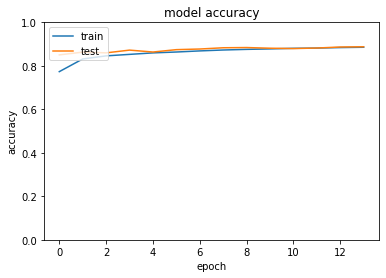

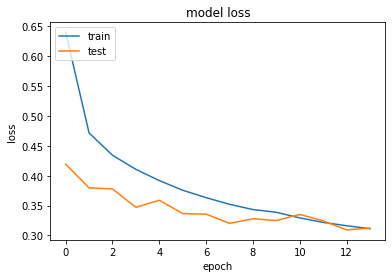

In [360]:
# GRAFICOS DE EVOLUCIÓN PARA EL PM
plt.plot(historico_pm.history['sparse_categorical_accuracy'])
plt.plot(historico_pm.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

plt.plot(historico_pm.history['loss'])
plt.plot(historico_pm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [361]:
#MEJOR ÉPOCA, LOSS Y ACCURACY DE TRAIN Y VALIDACIÓN CUANDO SE UTILIZA CHECKPOINT PARA EL PM
epochs_stop=np.where(historico_pm.history['val_loss'] == np.min(historico_pm.history['val_loss']))
final_epoch=epochs_stop[0][0]
"""print(final_epoch)
print(historico_pm.history['loss'][final_epoch-1])
print(historico_pm.history['val_loss'][final_epoch-1])
print(historico_pm.history['sparse_categorical_accuracy'][final_epoch-1])
print(historico_pm.history['val_sparse_categorical_accuracy'][final_epoch-1])"""

"""print("razón de apredizaje",lr)"""
print("epoch_final        ",final_epoch)
print("loss               ",historico_pm.history['loss'][final_epoch-1])
print("val_loss           ",historico_pm.history['val_loss'][final_epoch-1])
print("sparce_acuracy     ",historico_pm.history['sparse_categorical_accuracy'][final_epoch-1])
print("val_sparce_acuracy ",historico_pm.history['val_sparse_categorical_accuracy'][final_epoch-1])

epoch_final         12
loss                0.32184168696403503
val_loss            0.3244391977787018
sparce_acuracy      0.8817291855812073
val_sparce_acuracy  0.8819166421890259


# Definición modelo final

In [362]:
#DEFINICIÓN, COMPILACIÓN, ENTRENAMIENTO DEL MEJOR MODELO CNN CON LOS MEJORES HIPERPARÁMETROS
# Se supone que es el siguiente modelo
lr = 0.001
epochs = 9

model_cnn= Sequential()
model_cnn.add(BatchNormalization(input_shape=(28,28,1)))
"""model_cnn.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))"""

model_cnn.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu')) # En la imagen pone 356, está mal.
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(num_clases, activation='softmax'))

model_cnn.summary()

model_cnn.compile(
  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

historico_cnn = model_cnn.fit(train_images, train_labels, epochs=epochs)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_36 (Bat  (None, 28, 28, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_48 (Conv2D)          (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 dropout_100 (Dropout)       (None, 12, 12, 128)       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 10, 10, 256)       295168    
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 5, 5, 256)      

In [363]:
#EVALUACIÓN DEL MODELO CNN
from sklearn.metrics import confusion_matrix, classification_report
evaluacion_cnn=model_cnn.evaluate(test_images, test_labels)

#PREDICCIONES EN BRUTO
raw_testPred = model_cnn.predict(test_images)
#prediccion en bruto de los 10 primeros patrones de test: 
#10 vectores de valores reales 
print(raw_testPred[:10])

#PREDICCIONES DE LA CLASE
class_testPred = np.argmax(raw_testPred, axis=1)
#predicción de la clase de los 10 primeros patrones de test
print(class_testPred[:10])

cm_cnn=confusion_matrix(test_labels, class_testPred)
print(cm_cnn)

print('Classification Report')
target_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal',  'Shirt',   'Sneaker',  'Bag',   'Ankle Boot']
print(classification_report(test_labels, class_testPred, target_names=target_names))

313/313 [==============================] - 1s 2ms/step
[[1.75352562e-11 3.00888952e-13 8.69031843e-13 5.73804947e-16
  4.52034504e-12 1.13760393e-06 2.48083151e-12 6.53173447e-06
  9.99441415e-12 9.99992371e-01]
 [1.21361954e-05 4.09474841e-12 9.99469459e-01 4.18422796e-10
  3.85411171e-04 6.88321830e-11 1.33021516e-04 1.81502979e-10
  1.14652892e-08 2.76592100e-11]
 [3.07055862e-17 1.00000000e+00 3.08671519e-19 3.75451424e-17
  7.04187499e-21 2.11211133e-23 8.25748104e-20 3.89141849e-27
  6.62210102e-20 1.32623357e-26]
 [1.76087272e-18 1.00000000e+00 3.84583182e-20 4.91364764e-18
  2.79743416e-21 4.10013722e-26 1.64250320e-19 2.41132658e-29
  8.96359770e-24 4.35368915e-30]
 [1.14162706e-01 1.69860903e-09 6.10969495e-03 1.90337480e-04
  2.28761416e-03 1.48097326e-10 8.77249599e-01 2.45699891e-13
  5.22903427e-08 1.60410246e-13]
 [4.47573104e-13 1.00000000e+00 5.32376174e-15 7.32666857e-13
  3.17193616e-16 1.60160050e-17 9.36215268e-15 1.27316506e-20
  4.12535295e-13 4.57575765e-20]
 [6

In [364]:
#DEFINICIÓN, COMPILACIÓN, ENTRENAMIENTO DEL MEJOR MODELO PM CON LOS MEJORES HIPERPARÁMETROS
# se supone:
num_neuronas1=120
num_neuronas2=120
lr = 0.001
epochs = 14

model_pm = Sequential()
model_pm.add(BatchNormalization(input_shape=(28,28)))
model_pm.add(Flatten(input_shape=(28,28)))
model_pm.add(Dense(num_neuronas1, activation='relu'))
model_pm.add(Dense(num_neuronas2, activation='relu'))
model_pm.add(Dense(num_clases, activation='softmax'))

model_pm.compile(
  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

historico_pm = model_pm.fit(train_images, train_labels, epochs=epochs)

Epoch 1/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4423 - sparse_categorical_accuracy: 0.8381
Epoch 2/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3361 - sparse_categorical_accuracy: 0.8753
Epoch 3/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3013 - sparse_categorical_accuracy: 0.8881
Epoch 4/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2771 - sparse_categorical_accuracy: 0.8960
Epoch 5/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2547 - sparse_categorical_accuracy: 0.9042
Epoch 6/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2396 - sparse_categorical_accuracy: 0.9108
Epoch 7/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2247 - sparse_categorical_accuracy: 0.9148
Epoch 8/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2105 - sparse_categorical_accuracy: 0.9201
Epoch 9/14
1875/1875 [==========

In [365]:
#EVALUACIÓN DEL MODELO PM
from sklearn.metrics import confusion_matrix, classification_report
evaluacion_pm=model_pm.evaluate(test_images, test_labels)

#PREDICCIONES EN BRUTO
raw_testPred = model_pm.predict(test_images)
#prediccion en bruto de los 10 primeros patrones de test: 
#10 vectores de valores reales 
print(raw_testPred[:10])

#PREDICCIONES DE LA CLASE
class_testPred = np.argmax(raw_testPred, axis=1)
#predicción de la clase de los 10 primeros patrones de test
print(class_testPred[:10])

cm_pm=confusion_matrix(test_labels, class_testPred)
print(cm_pm)

print('Classification Report')
target_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal',  'Shirt',   'Sneaker',  'Bag',   'Ankle Boot']
print(classification_report(test_labels, class_testPred, target_names=target_names))

313/313 [==============================] - 1s 2ms/step
[[1.0257640e-08 8.0549495e-10 6.5969441e-10 2.9454654e-07 4.6012141e-09
  4.6416832e-04 8.6892049e-09 1.6292870e-02 1.5775838e-07 9.8324251e-01]
 [2.0016948e-02 5.1883407e-15 9.6047908e-01 7.1144033e-09 4.2501502e-05
  1.0165079e-07 1.9459015e-02 1.7794169e-09 2.2824981e-06 8.7508070e-11]
 [1.5272964e-17 1.0000000e+00 4.6449193e-23 6.1034808e-18 2.3567179e-21
  2.0989143e-31 5.9798284e-21 1.3530288e-37 1.3605241e-28 5.5151139e-31]
 [1.2484329e-16 1.0000000e+00 1.8676437e-19 1.4167064e-16 1.4117572e-19
  6.8911102e-24 5.5589551e-19 2.2828240e-29 3.3316844e-26 3.6432769e-25]
 [1.7399009e-02 1.8010202e-12 1.3018168e-06 4.3599599e-08 2.5542172e-07
  5.2010507e-11 9.8259938e-01 3.3970649e-14 4.4477733e-13 2.0836158e-13]
 [2.3625934e-12 1.0000000e+00 9.0078438e-18 5.2002532e-17 3.4370299e-15
  3.3974735e-26 1.0962085e-16 3.1808211e-29 1.7047922e-23 2.8242542e-26]
 [8.9785138e-11 1.1590555e-13 4.9934992e-05 4.1181423e-07 9.9940741e-01
  9

In [366]:
#GUARDAR RESULTADOS Y MODELOS
np.savetxt('evaluacion_cnn.txt',evaluacion_cnn,newline='\t')
np.savetxt('historicoTrainLoss_cnn.txt',historico_cnn.history['loss'])
np.savetxt('historicoTrainAcc_cnn.txt',historico_cnn.history['sparse_categorical_accuracy'])

np.savetxt('evaluacion_pm.txt',evaluacion_pm,newline='\t')
np.savetxt('historicoTrainLoss_pm.txt',historico_pm.history['loss'])
np.savetxt('historicoTrainAcc_pm.txt',historico_pm.history['sparse_categorical_accuracy'])

"""np.savetxt('salidas_pm.txt',class_testPred, newline= '\t')"""
# matriz de confusión
np.savetxt('matrizConf_cnn.txt', cm_cnn, fmt='%-3d')
#para guardar el modelo completo
model_cnn.save('modelo_cnn.h5')
#para guardar solo los pesos
model_cnn.save_weights('pesos_cnn.h5')

# matriz de confusión
np.savetxt('matrizConf_pm.txt', cm_pm, fmt='%-3d')
#para guardar el modelo completo
model_pm.save('modelo_pm.h5')
#para guardar solo los pesos
model_pm.save_weights('pesos_pm.h5')